# Feature engineering for dataset heart sounds

- Convert the dataset the spectogram
- Extract latent features from it
- Link for dataset : https://physionet.org/pn3/challenge/2016/

### Convert the dataset to spectogram
- Import modules
- Read the training files
- Convert wavs to spectogram

In [16]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import urllib
import matplotlib.pyplot as plt



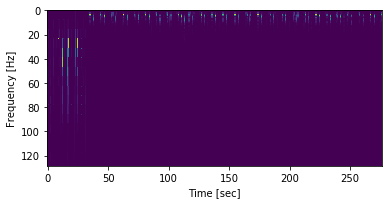

In [19]:
sample_rate, samples = wavfile.read('a0204.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

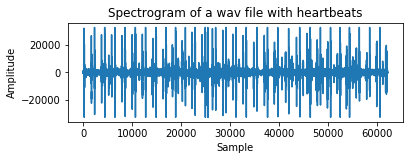

In [35]:
samplingFrequency, signalData = wavfile.read('a0204.wav')

 

# Plot the signal read from wav file

plt.subplot(211)

plt.title('Spectrogram of a wav file with heartbeats')

 

plt.plot(signalData)

plt.xlabel('Sample')

plt.ylabel('Amplitude')

 

plt.show()



Text(0, 0.5, 'Frequency')

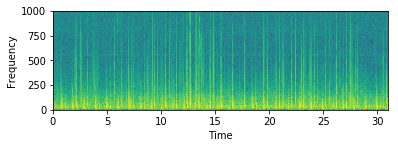

In [37]:
plt.subplot(212)

plt.specgram(signalData,Fs=samplingFrequency)

plt.xlabel('Time')

plt.ylabel('Frequency')

In [39]:
def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    """ short time fourier transform of audio signal """
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))
    
    # zeros at beginning (thus center of 1st window should be for sample nr. 0)
    samples = np.append(np.zeros(np.floor(frameSize/2.0)), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))
    
    frames = stride_tricks.as_strided(samples, shape=(cols, frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win
    
    return np.fft.rfft(frames)    


In [40]:
def logscale_spec(spec, sr=44100, factor=20.):
    """ scale frequency axis logarithmically """    
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins-1)/max(scale)
    scale = np.unique(np.round(scale))
    
    # create spectrogram with new freq bins
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            newspec[:,i] = np.sum(spec[:,scale[i]:], axis=1)
        else:        
            newspec[:,i] = np.sum(spec[:,scale[i]:scale[i+1]], axis=1)
    
    # list center freq of bins
    allfreqs = np.abs(np.fft.fftfreq(freqbins*2, 1./sr)[:freqbins+1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            freqs += [np.mean(allfreqs[scale[i]:])]
        else:
            freqs += [np.mean(allfreqs[scale[i]:scale[i+1]])]
    
    return newspec, freqs


In [41]:
def plotstft(audiopath, binsize=2**10, plotpath=None, colormap="jet"):
    """ plot spectrogram"""
    samplerate, samples = wav.read(audiopath)
    s = stft(samples, binsize)
    
    sshow, freq = logscale_spec(s, factor=1.0, sr=samplerate)
    ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel
    
    timebins, freqbins = np.shape(ims)
    
    plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(ims), origin="lower", aspect="auto", cmap=colormap, interpolation="none")
    plt.colorbar()

    plt.xlabel("time (s)")
    plt.ylabel("frequency (hz)")
    plt.xlim([0, timebins-1])
    plt.ylim([0, freqbins])

    xlocs = np.float32(np.linspace(0, timebins-1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])
    
    if plotpath:
        plt.savefig(plotpath, bbox_inches="tight")
    else:
        plt.show()
        
    plt.clf()


In [44]:
plotstft("audiopath")

NameError: name 'wav' is not defined